In [1]:
import pandas as pd
import numpy as np

In [2]:
from acquire import github_api_request

In [3]:
# Standard imports for scrpaing
from requests import get
from bs4 import BeautifulSoup
import os



# Used to run selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


In [4]:
from env import github_token, github_username

In [5]:
import sys

sys.path.append('..')

import prepare
from prepare import clean_strings, tokenize, remove_stopwords, stem, lemmatize

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


In [7]:
url = 'https://github.com/trending?spoken_language_code=en'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [8]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup.h3
links = soup.find_all('h2', class_="h3 lh-condensed")
links


[<h2 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":400215964,"originating_url":"https://github.com/trending?spoken_language_code=en","user_id":null}}' data-hydro-click-hmac="ec107ceae8568995e43964ff62b0e50330a4bd1eec0a74e4e3b5165d1ff0756b" data-view-component="true" href="/novuhq/novu">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.249.2

In [9]:
links[0].a['href']

'/novuhq/novu'

In [10]:
[link.a['href'] for link in links]

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java']

In [11]:
path_list = ['daily', 'weekly', 'monthly']

In [12]:
repo_urls = []

for path in path_list:
    url = f'https://github.com/trending?since={path}&spoken_language_code=en'
    headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
    response = get(url, headers=headers)
    # Make a soup variable holding the response content
    
    soup = BeautifulSoup(response.content, 'html.parser')
    # print(soup)
    soup.h3
    links = soup.find_all('h2', class_="h3 lh-condensed")
    
#     links_dict = {
#         path : [link.a['href'] for link in links]
#     }
    
    
    repo_urls += [link.a['href'] for link in links]

In [13]:
repo_urls

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/codecrafters-io/build-your-own-x',
 '/immich-app/immich',
 '/SimplifyJobs/Summer2024-Internships',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto

In [14]:
url_df = pd.DataFrame(repo_urls)

In [15]:
url_df.head()


,0
0,/novuhq/novu
1,/ververica/flink-cdc-connectors
2,/Sophia-Community/SophiApp
3,/groue/GRDB.swift
4,/cloud-hypervisor/cloud-hypervisor


In [16]:
url_df.drop_duplicates(inplace=True)


In [17]:
len(url_df)

62

In [18]:
url_df[0].to_list()

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/immich-app/immich',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto/hiring-without-whiteboards',
 '/awesome-selfhosted/awesome-selfhosted',
 '/ope

In [19]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [20]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup
# links = soup.find_all('div', class_="Box-sc-g0xbh4-0 bBwPjs search-title")
# links

{"payload":{"header_redesign_enabled":false,"results":[{"id":"5131769","archived":false,"color":"#438eff","followers":701,"has_funding_file":false,"hl_name":"eklipse2k8/FilterKit","hl_trunc_description":"iOS Framework for easily adding Camera with Filters","language":"Objective-C","mirror":false,"owned_by_organization":false,"public":true,"repo":{"repository":{"id":5131769,"name":"FilterKit","owner_id":40286,"owner_login":"eklipse2k8","updated_at":"2012-07-23T21:39:31.000Z","has_issues":true}},"sponsorable":false,"topics":[],"type":"Public","help_wanted_issues_count":0,"good_first_issue_issues_count":0,"starred_by_current_user":false},{"id":"1359757","archived":true,"color":"#701516","followers":690,"has_funding_file":false,"hl_name":"SchemaPlus/schema_plus","hl_trunc_description":"SchemaPlus provides a collection of enhancements and extensions to ActiveRecord","language":"Ruby","mirror":false,"owned_by_organization":true,"public":true,"repo":{"repository":{"id":1359757,"name":"schema_

In [21]:
# df['your_column_here'] = df['your_column_here'].apply(lambda string: remove_stopwords(tokenize(basic_clean(string))))
# df.head()

In [22]:
import json

# Specify the path to your JSON file
json_file_path = "data2.json"

# Read the JSON data from the file and load it into a Python dictionary
with open(json_file_path, "r") as json_file:
    df = json.load(json_file)



In [23]:
df = prepare.prepare_data()

In [24]:
df.language.value_counts()

JavaScript                  47
Python                      39
Java                        30
TypeScript                  21
Go                          17
HTML                        16
C++                         15
Jupyter Notebook            11
C                           11
Shell                        9
C#                           5
Ruby                         5
PHP                          5
TeX                          3
Dockerfile                   3
Kotlin                       3
CSS                          3
Scala                        2
Swift                        2
Vue                          2
Groovy                       2
Markdown                     1
AsciiDoc                     1
CoffeeScript                 1
MDX                          1
Pascal                       1
Wikitext                     1
CMake                        1
DIGITAL Command Language     1
SCSS                         1
Batchfile                    1
Objective-C                  1
Dart    

In [25]:
df.language.value_counts().sum()


267

In [26]:
df[df.language.isnull()==True]

,repo,language,readme_contents,clean_text,stem,lemmatize,target


In [27]:
df = prepare.prepare_data()

In [28]:
labels = pd.concat([df.target.value_counts(),
                    df.target.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']

In [29]:
labels

,n,percent
0,181,0.677903
2,47,0.176030
1,39,0.146067


In [30]:
df.tail()

,repo,language,readme_contents,clean_text,stem,lemmatize,target
262,HashLips/hashlips_art_engine,JavaScript,# Welcome to HashLips 👄\n\n![](https://github....,welcome hashlips httpsgithubcomhashlipshashlip...,welcom hashlip httpsgithubcomhashlipshashlipsa...,welcome hashlips httpsgithubcomhashlipshashlip...,2
263,microsoft/vscode-docs,CSS,"<p align=""center"">\n <img alt=""vscode logo"" s...",aligncenter img altvscode logo srcimageslogost...,aligncent img altvscod logo srcimageslogostabl...,aligncenter img altvscode logo srcimageslogost...,0
264,matthieua/WOW,JavaScript,# WOW.js [![Build Status](https://secure.travi...,wowjs build statushttpssecuretravisciorgmatthi...,wowj build statushttpssecuretravisciorgmatthie...,wowjs build statushttpssecuretravisciorgmatthi...,2
265,PHPOffice/PHPExcel,PHP,"# PHPExcel - DEAD\n\nPHPExcel last version, 1....",phpexcel dead phpexcel last version released p...,phpexcel dead phpexcel last version releas pro...,phpexcel dead phpexcel last version released p...,0
266,bradtraversy/vanillawebprojects,JavaScript,# 20+ Web Projects With Vanilla JavaScript\n\n...,web projects vanilla javascript main repositor...,web project vanilla javascript main repositori...,web project vanilla javascript main repository...,2


# Split the data

In [31]:
# df, _, _ = prepare.split_data()

In [32]:
# df[df['language'].isna()]
# df.dropna(inplace=True)

# Exploration

In [33]:
python_words = ' '.join(df[df.target == 1]['stem']).split()
js_words = ' '.join(df[df.target == 2]['stem']).split()
other_words = ' '.join(df[df.target == 0]['stem']).split()
all_words = ' '.join(df.stem).split()

In [34]:
len(python_words)

37586

In [35]:
filtered_python_words = [word for word in python_words if len(word) <= 12]
python_words = [word for word in filtered_python_words if len(word) > 1]
python_words = [word for word in python_words if not word.isdigit()]

In [36]:
python_words

['python',
 'mdqqpython',
 'day',
 'img',
 'stylezoom',
 'python',
 'python',
 'python',
 'python',
 'java',
 'go',
 'php',
 'devop',
 'python',
 'shell',
 'rubi',
 'python',
 'java',
 'python',
 'python',
 'julia',
 'matlab',
 'python',
 'julia',
 'python',
 'shell',
 'python',
 'python',
 'python',
 'python',
 'python',
 'python',
 'make',
 'english',
 'work',
 'languag',
 'practic',
 'make',
 'perfect',
 'experi',
 'come',
 'mistak',
 'dont',
 'one',
 'leech',
 'either',
 'outstand',
 'day',
 'pythonday',
 'day',
 'python',
 'python',
 'python',
 'python',
 'window',
 'linux',
 'maco',
 'python',
 'hello',
 'world',
 'print',
 'idl',
 'repl',
 'idl',
 'day',
 'daymd',
 'input',
 'day',
 'daymd',
 'ifels',
 'ifelifels',
 'day',
 'daymd',
 'break',
 'continu',
 'rang',
 'day',
 'daymd',
 'crap',
 'day',
 'daymd',
 'def',
 'return',
 'python',
 'day',
 'daymd',
 'rang',
 'key',
 'valu',
 'item',
 'setdefault',
 'fibonacci',
 'day',
 'daymd',
 'str',
 'day',
 'daymd',
 'slot',
 'add',
 

In [37]:
[word for word in python_words if len(word) == 12]

['multiprocess',
 'reportlabpdf',
 'respylintpng',
 'dockercompos',
 'altcontribut',
 'altprecommit',
 'readmezhtwmd',
 'cdncdnurlcdn',
 'cdncdnurlcdn',
 'oraclemateri',
 'documentstor',
 'redismemcach',
 'httphttphttp',
 'itemsbrbrkey',
 'plentyoffish',
 'plentyoffish',
 'aligncentera',
 'altxmatchmak',
 'altmatthewag',
 'altkreativai',
 'altsatenpriv',
 'altdigisomni',
 'altleerobida',
 'altrawbanana',
 'altpingbotan',
 'altjondwilli',
 'altnicoguyon',
 'altclortegah',
 'altsvpermari',
 'altjacobyobi',
 'altturintech',
 'altcfarquhar',
 'altpingshian',
 'altkiaarmani',
 'altasmithowl',
 'altrviramont',
 'developmenti',
 'supstatussup',
 'pstrongspeci',
 'businessbusi',
 'healthhealth',
 'dataopendata',
 'shoppingshop',
 'datatestdata',
 'weatherweath',
 'documentsfil',
 'metropolitan',
 'passwordless',
 'passwordless',
 'industrylead',
 'openapiswagg',
 'accountclust',
 'digitalocean',
 'digitalocean',
 'extendsclass',
 'pixelperfect',
 'superresolut',
 'carbonintens',
 'geekyprogram

In [38]:
len(python_words)

32312

In [39]:
filtered_js_words = [word for word in js_words if len(word) <= 12]
js_words = [word for word in filtered_js_words if len(word) > 1]

In [40]:
js_words = [word for word in js_words if not word.isdigit()]

In [41]:
js_words

['aligncent',
 'img',
 'altbootstrap',
 'logo',
 'width',
 'height',
 'aligncent',
 'sleek',
 'intuit',
 'power',
 'frontend',
 'framework',
 'faster',
 'easier',
 'web',
 'develop',
 'br',
 'bootstrap',
 'doc',
 'stronga',
 'br',
 'br',
 'buga',
 'featurea',
 'bootstrap',
 'default',
 'branch',
 'develop',
 'bootstrap',
 'releas',
 'head',
 'vdev',
 'view',
 'readm',
 'document',
 'sourc',
 'code',
 'bootstrap',
 'tabl',
 'content',
 'quick',
 'statusstatu',
 'what',
 'bug',
 'featur',
 'creatorscr',
 'thanksthank',
 'copyright',
 'quick',
 'start',
 'sever',
 'quick',
 'start',
 'option',
 'avail',
 'download',
 'latest',
 'clone',
 'repo',
 'git',
 'clone',
 'instal',
 'npm',
 'instal',
 'bootstrapv',
 'instal',
 'yarn',
 'add',
 'bootstrapv',
 'instal',
 'compos',
 'requir',
 'instal',
 'css',
 'bootstrap',
 'sass',
 'read',
 'get',
 'start',
 'inform',
 'framework',
 'content',
 'templat',
 'exampl',
 'statu',
 'build',
 'npm',
 'gem',
 'meteor',
 'packagist',
 'coverag',
 'css',


In [42]:
filtered_other_words = [word for word in other_words if len(word) <= 12]
other_words = [word for word in filtered_other_words if len(word) > 1]
other_words = [word for word in other_words if not word.isdigit()]

In [43]:
other_words

['well',
 'hello',
 'repositori',
 'meant',
 'provid',
 'exampl',
 'fork',
 'repositori',
 'github',
 'creat',
 'fork',
 'produc',
 'person',
 'copi',
 'someon',
 'els',
 'project',
 'fork',
 'act',
 'sort',
 'bridg',
 'origin',
 'repositori',
 'person',
 'copi',
 'submit',
 'pull',
 'request',
 'help',
 'make',
 'peopl',
 'project',
 'better',
 'offer',
 'chang',
 'origin',
 'project',
 'fork',
 'core',
 'social',
 'code',
 'github',
 'fork',
 'repositori',
 'make',
 'chang',
 'project',
 'submit',
 'pull',
 'practic',
 'inform',
 'fork',
 'repositori',
 'check',
 'guid',
 'fork',
 'thank',
 'welcom',
 'smartth',
 'public',
 'github',
 'repo',
 'repo',
 'contain',
 'develop',
 'code',
 'smartapp',
 'groovi',
 'dth',
 'dynam',
 'type',
 'handler',
 'link',
 'help',
 'get',
 'start',
 'develop',
 'develop',
 'commun',
 'smartth',
 'edg',
 'devic',
 'driver',
 'new',
 'method',
 'integr',
 'hub',
 'connect',
 'devic',
 'smartth',
 'platform',
 'launch',
 'smartth',
 'edg',
 'take',
 'eve

In [44]:
filtered_all_words = [word for word in all_words if len(word) <= 12]
all_words = [word for word in filtered_all_words if len(word) > 1]
all_words = [word for word in all_words if not word.isdigit()]

In [45]:
len(other_words)

116586

In [46]:
len(filtered_other_words)

116587

In [47]:
# Creates a frequency Series for the words
python_freq = pd.Series(python_words).value_counts()
js_freq = pd.Series(js_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [48]:
js_freq

javascript    742
use           559
icon          458
function      401
const         334
             ... 
subauthor       1
yetayehabr      1
sub             1
thirti          1
appreci         1
Length: 5575, dtype: int64

In [49]:
len('py2neohttpspy2neoorg')

20

In [50]:
all_freq.head(50)

use           2088
ye            1751
sourc         1527
free          1389
api           1126
code           976
data           971
python         957
file           937
unknown        919
javascript     859
project        841
open           835
instal         806
build          802
img            773
develop        756
user           665
support        650
manag          632
run            611
web            609
app            605
apikey         602
creat          576
applic         571
gener          567
function       565
widthpx        560
aligncent      543
server         537
get            534
test           527
servic         526
icon           518
number         515
version        502
see            499
td             491
set            479
librari        463
window         462
includ         452
new            449
provid         435
make           435
licens         433
document       430
mit            429
tool           428
dtype: int64

In [51]:
word_counts = (pd.concat([all_freq, other_freq, js_freq, python_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'python'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,other,js,python
aa,63,63,0,0
aaa,3,3,0,0
aaaiali,2,0,0,2
aac,1,1,0,0
aaen,1,1,0,0


In [52]:
len('zyszyshttpsgithubcomzyszi')

25

In [53]:
word_counts

,all,other,js,python
aa,63,63,0,0
aaa,3,3,0,0
aaaiali,2,0,0,2
aac,1,1,0,0
aaen,1,1,0,0
...,...,...,...,...
zwave,1,1,0,0
zxvf,1,0,1,0
zymiboxpay,1,1,0,0
zynga,1,0,0,1


In [54]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,other,js,python
use,2088,1293,559,236
ye,1751,7,2,1742
sourc,1527,1404,44,79
free,1389,1276,57,56
api,1126,566,110,450
code,976,604,212,160
data,971,416,117,438
python,957,316,5,636
file,937,591,197,149
unknown,919,4,0,915


In [55]:
pd.concat([word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
            word_counts[word_counts.js == 0].sort_values(by='js').tail(6),
            word_counts[word_counts.other == 0].sort_values(by='other').tail(6)])

,all,other,js,python
furthest,2,2,0,0
furukawa,1,0,1,0
fuse,1,1,0,0
fusix,1,1,0,0
funcinida,2,2,0,0
zypper,1,0,1,0
fortebr,1,1,0,0
fortebsubabr,1,1,0,0
forthcom,1,1,0,0
fortnit,1,0,0,1


In [56]:
word_counts_reset = word_counts.reset_index()

# Melt the DataFrame

melted_word_counts = pd.melt(
    word_counts_reset, 
    id_vars=['index'], 
    var_name='language', 
    value_name='count'
)

In [57]:
melted_word_counts = melted_word_counts[melted_word_counts['count']!=0]
melted_word_counts

,index,language,count
0,aa,all,63
1,aaa,all,3
2,aaaiali,all,2
3,aac,all,1
4,aaen,all,1
...,...,...,...
71176,zookeep,python,1
71177,zooql,python,1
71178,zope,python,1
71185,zsdonghao,python,1


In [58]:
labels = pd.concat([melted_word_counts.language.value_counts(),
                    melted_word_counts.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
all,17801,0.430589
other,12677,0.306645
js,5575,0.134854
python,5288,0.127912


In [114]:
word_series = pd.Series(all_words)

# Get the value counts of each word
word_counts = word_series.value_counts()

# Filter out words that appear only once
filtered_words = word_counts[word_counts > 10]

In [115]:
filtered_words

use       2088
ye        1751
sourc     1527
free      1389
api       1126
          ... 
linear      11
isc         11
inclus      11
webdav      11
hadoop      11
Length: 2117, dtype: int64

,0
use,2088
ye,1751
sourc,1527
free,1389
api,1126
...,...
bashgit,1
ptb,1
catalin,1
gianni,1


""
0
1
2
3
4
5
...
1126
1389
1527


# Visualiztions

Text(0.5, 1.0, 'Proportion of the 20 most common Python words')

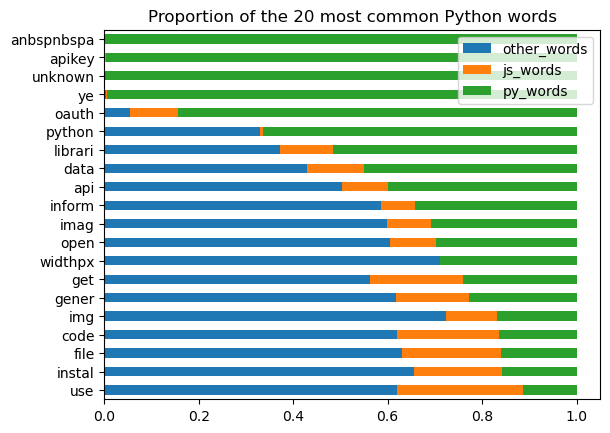

In [59]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='python')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('py_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Python words')


Text(0.5, 1.0, 'Proportion of the 20 most common JavaScript words')

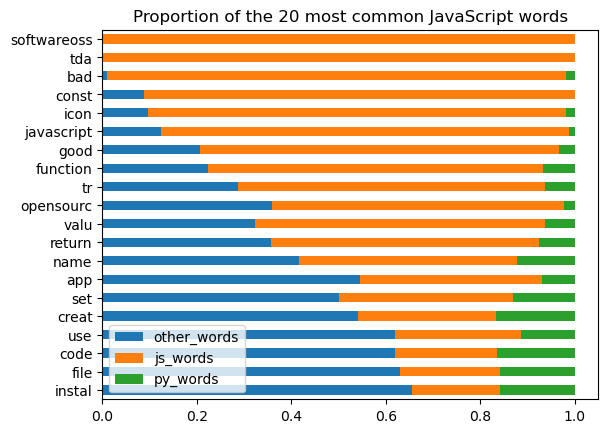

In [60]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='js')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('js_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common JavaScript words')


Text(0.5, 1.0, 'Proportion of the 20 most common Other words')

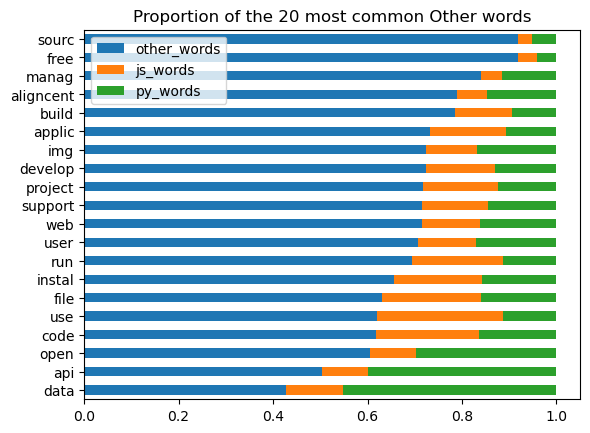

In [61]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='other')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('other_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Other words')


In [62]:
python_words

['python',
 'mdqqpython',
 'day',
 'img',
 'stylezoom',
 'python',
 'python',
 'python',
 'python',
 'java',
 'go',
 'php',
 'devop',
 'python',
 'shell',
 'rubi',
 'python',
 'java',
 'python',
 'python',
 'julia',
 'matlab',
 'python',
 'julia',
 'python',
 'shell',
 'python',
 'python',
 'python',
 'python',
 'python',
 'python',
 'make',
 'english',
 'work',
 'languag',
 'practic',
 'make',
 'perfect',
 'experi',
 'come',
 'mistak',
 'dont',
 'one',
 'leech',
 'either',
 'outstand',
 'day',
 'pythonday',
 'day',
 'python',
 'python',
 'python',
 'python',
 'window',
 'linux',
 'maco',
 'python',
 'hello',
 'world',
 'print',
 'idl',
 'repl',
 'idl',
 'day',
 'daymd',
 'input',
 'day',
 'daymd',
 'ifels',
 'ifelifels',
 'day',
 'daymd',
 'break',
 'continu',
 'rang',
 'day',
 'daymd',
 'crap',
 'day',
 'daymd',
 'def',
 'return',
 'python',
 'day',
 'daymd',
 'rang',
 'key',
 'valu',
 'item',
 'setdefault',
 'fibonacci',
 'day',
 'daymd',
 'str',
 'day',
 'daymd',
 'slot',
 'add',
 

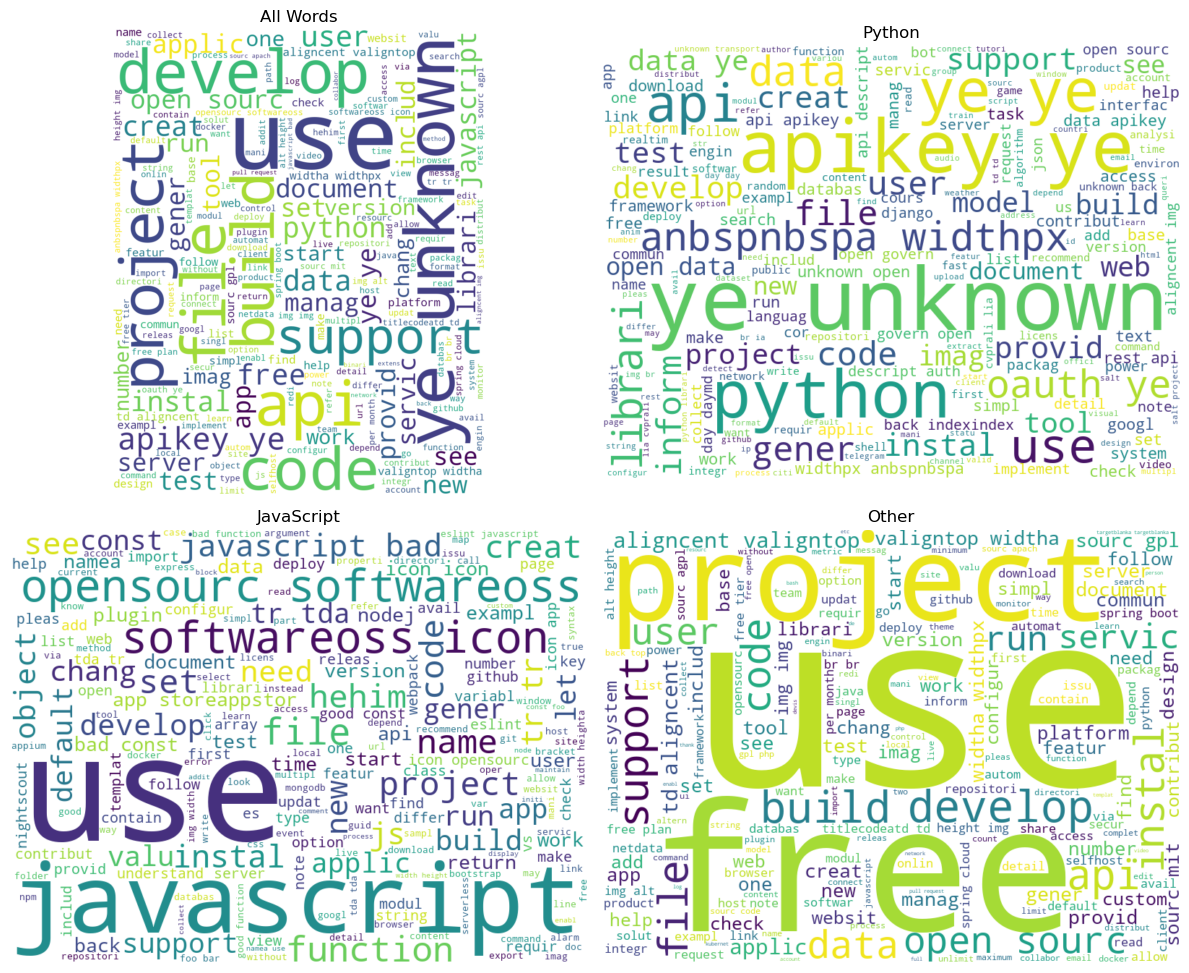

In [63]:

all_cloud = WordCloud(background_color='white', height=1000, width=800).generate(' '.join(all_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))
js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
other_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(other_words))

plt.figure(figsize=(12, 10))

# Create an array of subplots
axs = [
    plt.subplot(2, 2, 1),
    plt.subplot(2, 2, 2),
    plt.subplot(2, 2, 3),
    plt.subplot(2, 2, 4)
]

# Plot each word cloud on a separate subplot
axs[0].imshow(all_cloud, interpolation='bilinear')
axs[1].imshow(python_cloud, interpolation='bilinear')
axs[2].imshow(js_cloud, interpolation='bilinear')
axs[3].imshow(other_cloud, interpolation='bilinear')

# Set titles for each subplot
axs[0].set_title('All Words')
axs[1].set_title('Python')
axs[2].set_title('JavaScript')
axs[3].set_title('Other')

# Turn off axis labels for all subplots
for ax in axs:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Display the entire plot
plt.show()


In [64]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()


(ye, unknown)            838
(apikey, ye)             576
(ye, ye)                 396
(anbspnbspa, widthpx)    156
(oauth, ye)              146
dtype: int64

In [65]:
top_20_js_bigrams = (pd.Series(nltk.ngrams(js_words, 2))
                      .value_counts()
                      .head(20))

top_20_js_bigrams.head()


(opensourc, softwareoss)    251
(softwareoss, icon)         245
(javascript, bad)           114
(tr, tr)                    108
(tr, tda)                    85
dtype: int64

In [66]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_other_bigrams.head()


(open, sourc)             343
(aligncent, valigntop)    289
(valigntop, widtha)       283
(td, aligncent)           283
(widtha, widthpx)         282
dtype: int64

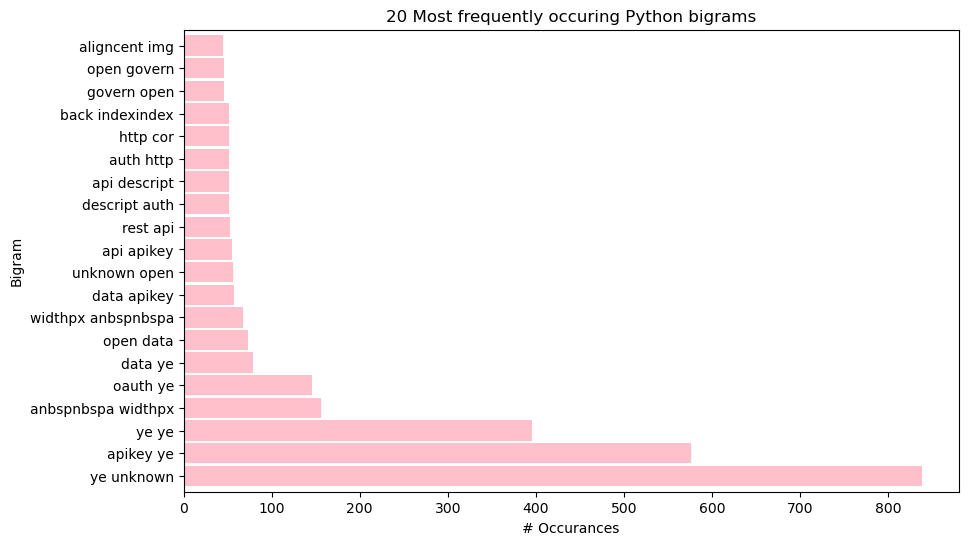

In [67]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


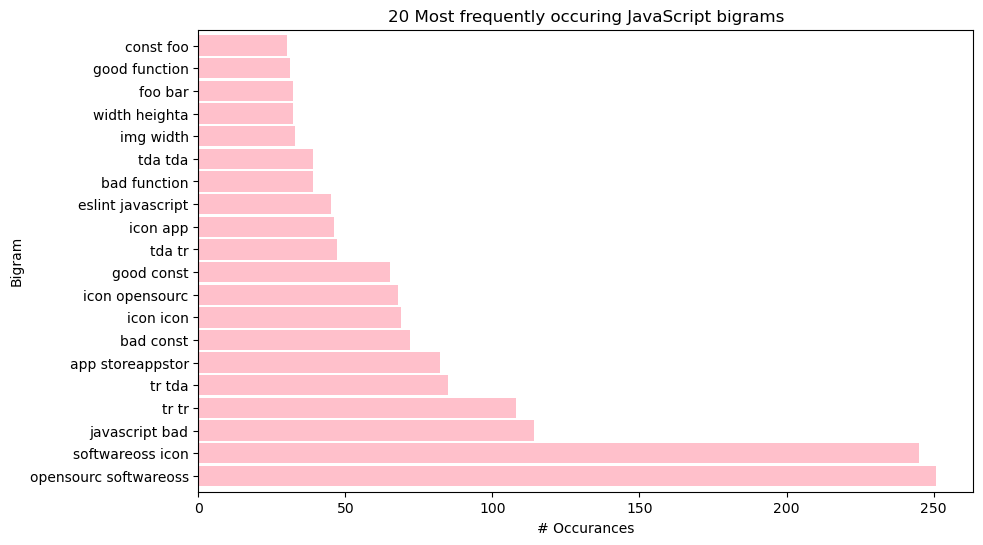

In [68]:
top_20_js_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


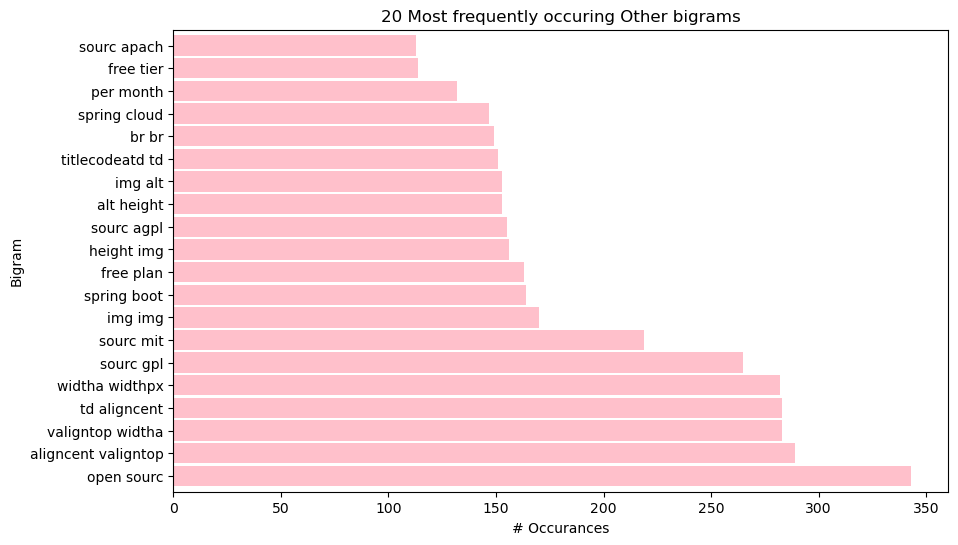

In [69]:
top_20_other_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


# Bag of Words

In [70]:
data = ' '.join(melted_word_counts['index']).split()


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(data)

In [72]:
cv.vocabulary_


{'aa': 0,
 'aaa': 1,
 'aaaiali': 2,
 'aac': 3,
 'aaen': 4,
 'aakash': 5,
 'aal': 6,
 'aalborg': 7,
 'aan': 8,
 'aapo': 9,
 'aappend': 10,
 'aappendc': 11,
 'aardvark': 12,
 'aaron': 13,
 'ab': 14,
 'abacu': 15,
 'abar': 16,
 'abatebr': 17,
 'abatebsubabr': 18,
 'abbeel': 19,
 'abbr': 20,
 'abbrevi': 21,
 'abc': 22,
 'abcsun': 23,
 'abdelghanybr': 24,
 'abdullah': 25,
 'abhinav': 26,
 'abhishek': 27,
 'abi': 28,
 'abid': 29,
 'abierto': 30,
 'abil': 31,
 'abl': 32,
 'ablist': 33,
 'aboard': 34,
 'abort': 35,
 'aboutabout': 36,
 'aboutpug': 37,
 'abovelist': 38,
 'abr': 39,
 'abracadabra': 40,
 'abraham': 41,
 'abrhm': 42,
 'abrira': 43,
 'absenc': 44,
 'absent': 45,
 'absolut': 46,
 'absoluto': 47,
 'absorb': 48,
 'abstract': 49,
 'abstractcfp': 50,
 'abus': 51,
 'academ': 52,
 'academia': 53,
 'acc': 54,
 'acceler': 55,
 'accent': 56,
 'accept': 57,
 'acces': 58,
 'access': 59,
 'accessatd': 60,
 'accesslint': 61,
 'accessor': 62,
 'accesstoken': 63,
 'accident': 64,
 'accio': 65,
 'ac

In [73]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [74]:
bow

,aa,aaa,aaaiali,aac,aaen,aakash,aal,aalborg,aan,aapo,...,ztree,zulip,zuma,zurb,zuul,zwave,zxvf,zymiboxpay,zynga,zypper
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
word_df = bow.apply(lambda row: row / row.sum(), axis=1)
word_df

,aa,aaa,aaaiali,aac,aaen,aakash,aal,aalborg,aan,aapo,...,ztree,zulip,zuma,zurb,zuul,zwave,zxvf,zymiboxpay,zynga,zypper
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
word_df.sum().max()

4.0